## EXERCISE 1

<img src='https://drive.google.com/uc?id=1C2vyT2X19C_IekWf3rELuF4SumvJxo2b'>

1) Write a Python script that computes P(g|do(r)) seen during the lecture

2) What is the causal effect of the cloudy weather $c$ on the grass' wetness $g$? (i.e. math expression of $P(g | do(c))$

3) Between rain and sprinkler, which one has the stronger causal effect on the wetness, $P(g | do(r))$ or $P(g | do(s))$ ?

4) Compute the average causal effect (ACE) of the sprinkler on the wetness $g$.

In [ ]:
import numpy as np

PC=np.array([0.5,0.5])
PR_C=np.array([[0.8,0.1],[0.2,0.9]])
PS_C=np.array([[0.1,0.5],[0.9,0.5]])
PG_RS=np.array([[[0.95,0.90],[0.90,0.10]],[[0.05,0.10],[0.10,0.90]]])

In [ ]:
#domanda 1 numpy
PG_RC=PS_C[0,0]*PG_RS[:,0,0]+PS_C[1,0]*PG_RS[:,0,1]
print(PG_RC)
PG_RnotC=PS_C[0,1]*PG_RS[:,0,0]+PS_C[1,1]*PG_RS[:,0,1]
print(PG_RnotC)

PG_doR=PG_RC[:]*PC[0]+PG_RnotC[:]*PC[1]
print(PG_doR)

[0.905 0.095]
[0.925 0.075]
[0.915 0.085]


In [ ]:
#domanda 2 P(g|do(c)) numpy

PG_doC=PG_RS[:,0,0]*PR_C[0,0]*PS_C[0,0]+PG_RS[:,0,1]*PR_C[0,0]*PS_C[1,0]+PG_RS[:,1,0]*PR_C[1,0]*PS_C[0,0]+PG_RS[:,1,1]*PR_C[1,0]*PS_C[1,0]
print(PG_doC)

[0.76 0.24]


In [ ]:
#domanda 3 P(g|do(s)) e confronto con P(g|do(r)) numpy
PR=PR_C[:,0]*PC[0]+PR_C[:,1]*PC[1]
print(PR)

PG_doS=PG_RS[:,0,0]*PR[0]+PG_RS[:,1,0]*PR[1]
print(PG_doS)

[0.45 0.55]
[0.9225 0.0775]


In [ ]:
#domanda 4 ACE of s on g numpy

PG_donotS=PG_RS[:,0,1]*PR[0]+PG_RS[:,1,1]*PR[1]
print(PG_donotS)

ACE=PG_doS[:]-PG_donotS[:]
print(ACE)

[0.46 0.54]
[ 0.4625 -0.4625]


In [ ]:
#import pyagrum
!pip install pyAgrum

from IPython.display import display, Math, Latex
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.causal as csl
import pyAgrum.causal.notebook as cslnb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#modello

m1=gum.fastBN("Cloudy{t|f}->Sprinkler{t|f}->GrassWet{t|f}<-Rain{t|f}<-Cloudy")

m1.cpt("Cloudy")[:]=[0.5,0.5]
m1.cpt("Sprinkler")[:]=[[0.1,0.9],  #cloudy true
                        [0.5,0.5]]  #cloudy false

m1.cpt("Rain")[:]=[[0.8,0.2],  #cloudy true
                  [0.1,0.9]]  #cloudy false

m1.cpt("GrassWet")[{"Sprinkler":"t","Rain":"t"}]=[0.95,0.05]
m1.cpt("GrassWet")[{"Sprinkler":"t","Rain":"f"}]=[0.9,0.1]
m1.cpt("GrassWet")[{"Sprinkler":"f","Rain":"t"}]=[0.9,0.1]
m1.cpt("GrassWet")[{"Sprinkler":"f","Rain":"f"}]=[0.1,0.9]

gnb.flow.row(m1,m1.cpt("Cloudy"),m1.cpt("Sprinkler"),m1.cpt("Rain"),m1.cpt("GrassWet"))

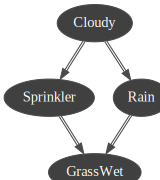

In [ ]:
d1 = csl.CausalModel(m1)
cslnb.showCausalModel(d1)

In [ ]:
cslnb.showCausalImpact(d1, "GrassWet", doing="Rain",values={"Rain" : "t"})

In [ ]:
cslnb.showCausalImpact(d1, "GrassWet", doing="Cloudy",values={"Cloudy" : "t"})

In [ ]:
cslnb.showCausalImpact(d1, "GrassWet", doing="Sprinkler",values={"Sprinkler" : "t"})
cslnb.showCausalImpact(d1, "GrassWet", doing="Sprinkler",values={"Sprinkler" : "f"})